# Spectrum class example
Simple example showing how the spectrum class works. Make sure you (pip) install the nasagamma module from: https://github.com/mauricioAyllon/NASA-gamma



In [16]:
%matplotlib inline
from nasagamma import spectrum as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Load data and extract counts, channels, and energy.

In [17]:
# dataset 1
file = "data/SSR-mcnp.hdf"
df = pd.read_hdf(file, key='data')

# delete first (large) bin
df = df.iloc[1:,:]

cts_np = df.cts.to_numpy() * 1e8
erg = np.array(df.index)
chan = np.arange(0,len(cts_np),1)

Instantiate a Spectrum object. Note that energy is an optional parameter. If it is not passed, channel numbers are infered.


In [18]:
# instantiate a Spectrum object
spect = sp.Spectrum(counts=cts_np, energies=erg)

Plot using the built-in plotting routine

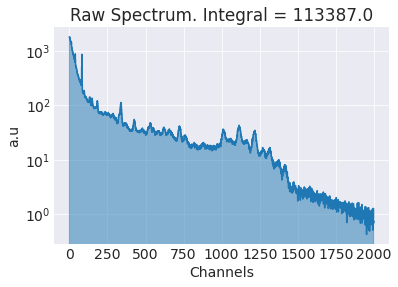

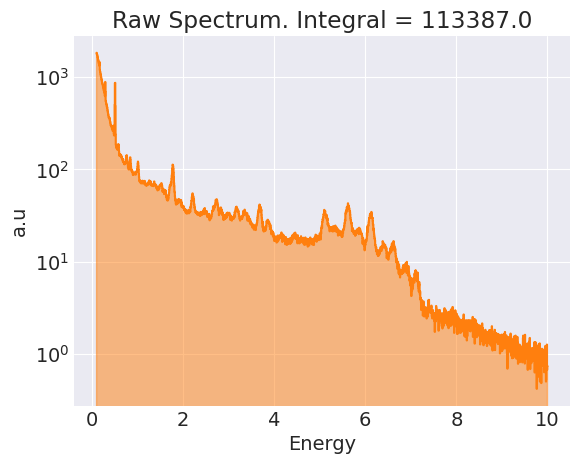

In [19]:
spect.plot()

We can also use some of the methods in the Spectrum class, such as rebin. Note that this conserves the area under the curve.


Text(0.5, 0, 'Energy [MeV]')

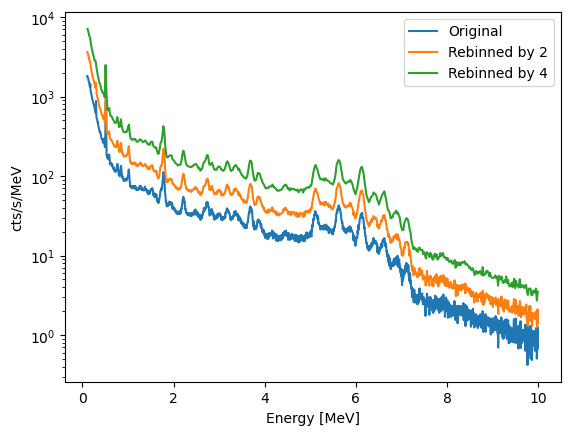

In [20]:
# rebin by 2 and by 4
ener2, cts2 = spect.rebin()
spect4 = sp.Spectrum(counts=cts2, energies=ener2)
ener4, cts4 = spect4.rebin()

plt.figure()
plt.plot(erg, cts_np, label="Original")
plt.plot(ener2, cts2, label="Rebinned by 2")
plt.plot(ener4, cts4, label="Rebinned by 4")
plt.yscale("log")
plt.legend()
plt.ylabel("cts/s/MeV")
plt.xlabel("Energy [MeV]")

We can also apply the smooth function, which performs a moving average smoothing of the data. Note that this method does not necessarily conserve the area under the curve.

Text(0.5, 0, 'Energy [MeV]')

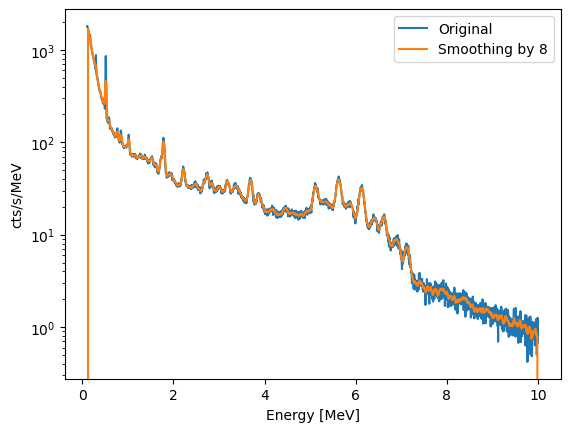

In [21]:
# smoothing every 8 points
spect_mv = sp.Spectrum(counts=cts_np, energies=erg)
n = 8
cts_mv = spect_mv.smooth(num=n)

plt.figure()
plt.plot(erg, cts_np, label="Original")
plt.plot(erg, cts_mv, label=f"Smoothing by {n}")
plt.yscale("log")
plt.legend()
plt.ylabel("cts/s/MeV")
plt.xlabel("Energy [MeV]")